# Midterm project
for the Machine Learning Zoomcamp by Alexey Grigorev. Learn more about the free bootcamp by following any of the links below. 

- https://mlzoomcamp.com
- https://github.com/alexeygrigorev/mlbookcamp-code/tree/master/course-zoomcamp

In [411]:
import time
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns


from twitter_scraper_selenium import get_profile_details

%matplotlib inline

## 1. Data collection

I have found a [dataset](https://github.com/antibot4navalny/accounts_labelled/blob/main/labels.json) of accounts recognized as Twitter bots'. The dataset is used in Chrome extention '[MetaBot for Twitter](https://github.com/antibot4navalny/metabot)' that highlights bots on Twitter.

To get a list of account names from the JSON I simply subset even keys.

As I have collected some data before I use list comparation to update information only for new names in bot list (updatable).

In [10]:
try:
    df_bots_old = pd.read_csv('twitter_bots_dataset.csv')
    bots_old_names = set(df_bots_old.screen_name.tolist())
except:
    bots_old_names = ()
print('bots_old_names: ', len(bots_old_names))

bots_old_names:  672


In [11]:
# Turn bots json file into a dictionary and compare with an old list of bots to check for updates:
bots_url = 'https://raw.githubusercontent.com/antibot4navalny/accounts_labelled/main/labels.json'
bots_dict = pd.read_json(bots_url, typ='series')
bots_list = list(bots_dict.keys())
bots_names = bots_list[1::2]

bots_new_names = list(set(bots_names) - set(bots_old_names))

bots_new_names
print(len(bots_new_names), bots_new_names)

51 ['GordeevaSamara', 'Katheri92373666', 'KathyHo87241217', 'kostkornl', 'Rosalva23944962', 'iraannhh', 'ilushakov_', 'lavrent_pasha', 'zokuznecova', 'Jennife46249662', 'Janell66927328', 'ded_maloletnij', 'sigazasigoy', 'AndreaP73330414', 'gordej_popov', 'skvorcov_trosha', 'IPracko', 'Tamekia66825359', 'hochu_pitsuu', 'ehidnaa_k', 'ollivimesh', 'kottowmak', 'grigfeds', 'zazerkal_v', 'ahmadiev_anton', 'apokalipsisa_s', 'aisa_letova', 'KMarmedova', 'vasencoo', 'osipovsah', 'svtojblinik_', 'licnyj_sort', 'polutonnaa', 'baskortotstan', 'marienmak', 'SofiMitrofanov_', 'oleghromov_', 'marknikoll', 'Jennife91361116', 'Jennife93704963', 'markinowa', 'tomatnyjsok2', 'justanaccsi', 'Krystal42545662', 'SasaKaramzin', 'kaztinina', 'JodiHeidenreic3', 'saharvvas', 'Misherbakov', 't_sledak', 'martinovpt']


In [15]:
# Use a simple loop for collecting bots' profiles into one dataframe:
profiles = []
for bot in bots_new_names:
    bot_profile = get_profile_details(twitter_username=bot)
    data = json.loads(bot_profile)
    profiles.append(data)
    #time.sleep(1)

df_bots_new = pd.json_normalize(profiles)

In [69]:
# Append old dataset with collected new data:
try:
    df_bots = pd.concat([df_bots_old, df_bots_new], axis=0, ignore_index=True)
except:
    df_bots = df_bots_new

# Mark bot users by '1' 
df_bots['bot'] = 1

df_bots

,id,id_str,name,screen_name,location,profile_location,description,url,protected,followers_count,...,status.retweeted_status.possibly_sensitive,status.retweeted_status.possibly_sensitive_editable,status.retweeted_status.self_thread.id,status.retweeted_status.self_thread.id_str,status.retweeted_status.entities.media,status.retweeted_status.extended_entities.media,status.self_thread.id,status.self_thread.id_str,entities.url.urls,bot
0,1.582274e+18,1.582274e+18,путешествие в маусвиль,MausvilV,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,1.584492e+18,1.584492e+18,Елена Горбачева,lenagrbu,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1.557303e+18,1.557303e+18,Ева Карпова,EvaKarpoff,NaN,NaN,Просто Ева ❤️,NaN,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,1.584519e+18,1.584519e+18,Даниил Воробушкин,d_vorobuskin,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1.580882e+18,1.580882e+18,вечеринка с коктейлями и тако,SVecerinka,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
769,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [70]:
# Save our dataframe to .csv file:
df_bots.to_csv('twitter_bots_dataset.csv', encoding='utf-8', index=False)

Now I have a list of bot users and now it's time to mix them with real person users to get a train set for a bot classification problem.

In [71]:
organic_url = "organic_names_IDs.txt"
organic_df = pd.read_csv(organic_url, sep='\t', header=None, na_filter=False)
organic_names = list(organic_df[0].unique())
print('organic_names: ', len(organic_names))

organic_names:  551


As I had collected this organic data the same way before, I will just open precollected dataset.

In [468]:
df_organic = pd.read_csv('twitter_organic_dataset.csv')

# Mark organic users by '0' 
df_organic['bot'] = 0
df_organic.to_csv('twitter_organic_dataset.csv', encoding='utf-8', index=False)

df_organic

,id,id_str,name,screen_name,location,profile_location,description,url,protected,followers_count,...,status.retweeted_status.place.bounding_box.coordinates,status.withheld_scope,status.withheld_in_countries,status.retweeted_status.withheld_scope,status.retweeted_status.withheld_in_countries,status.retweeted_status.quoted_status_id,status.retweeted_status.quoted_status_id_str,status.self_thread.id,status.self_thread.id_str,bot
0,1.510548e+18,1.510548e+18,Vladimir Vataman,VladimirVatama2,NaN,NaN,NaN,NaN,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1.510550e+18,1.510550e+18,Dzapo Lucci,Dimosyno,Третья от Солнца,NaN,Растите ваши крылья поближе к голове.\nВо избе...,NaN,False,80.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,1.510732e+18,1.510732e+18,Светлана Грицкова,SGrickova,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1.510869e+18,1.510869e+18,Толендияр Сейдакбаров,tolendiar,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1.510928e+18,1.510928e+18,Петр Углов,UglovPP,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546,1.583160e+18,1.583160e+18,Runner to Freedom,RunnertoFreedom,NaN,NaN,#nowar\nNo name writer,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
547,1.575539e+18,1.575539e+18,@Javi_DarkOSINT,JDarkosint,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
548,1.580157e+18,1.580157e+18,Vahmurka,admiral_sraka,NaN,NaN,NaN,NaN,False,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
549,1.582674e+18,1.582674e+18,Stellar Wildcat,WildStellarCat,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [471]:
# Full data set:
df_bots = pd.read_csv('twitter_bots_dataset.csv')
df_organic = pd.read_csv('twitter_organic_dataset.csv')
df = pd.concat([df_bots, df_organic], axis=0, ignore_index=True)
df

,id,id_str,name,screen_name,location,profile_location,description,url,protected,followers_count,...,status.retweeted_status.place.country,status.retweeted_status.place.contained_within,status.retweeted_status.place.bounding_box.type,status.retweeted_status.place.bounding_box.coordinates,status.withheld_scope,status.withheld_in_countries,status.retweeted_status.withheld_scope,status.retweeted_status.withheld_in_countries,status.retweeted_status.quoted_status_id,status.retweeted_status.quoted_status_id_str
0,1.582274e+18,1.582274e+18,путешествие в маусвиль,MausvilV,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.584492e+18,1.584492e+18,Елена Горбачева,lenagrbu,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.557303e+18,1.557303e+18,Ева Карпова,EvaKarpoff,NaN,NaN,Просто Ева ❤️,NaN,False,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.584519e+18,1.584519e+18,Даниил Воробушкин,d_vorobuskin,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.580882e+18,1.580882e+18,вечеринка с коктейлями и тако,SVecerinka,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1.583160e+18,1.583160e+18,Runner to Freedom,RunnertoFreedom,NaN,NaN,#nowar\nNo name writer,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1320,1.575539e+18,1.575539e+18,@Javi_DarkOSINT,JDarkosint,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1321,1.580157e+18,1.580157e+18,Vahmurka,admiral_sraka,NaN,NaN,NaN,NaN,False,25.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1322,1.582674e+18,1.582674e+18,Stellar Wildcat,WildStellarCat,NaN,NaN,NaN,NaN,False,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Exploratory data analysis (EDA) 
It is an especially important activity in the routine of a data analyst or scientist.

It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis.

It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business.

In [75]:
#Basic information

df.info()

#Describe the data

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1324 entries, 0 to 1323
Columns: 157 entries, id to status.retweeted_status.quoted_status_id_str
dtypes: float64(55), int64(1), object(101)
memory usage: 1.6+ MB


,id,id_str,profile_location,followers_count,fast_followers_count,normal_followers_count,friends_count,listed_count,favourites_count,utc_offset,...,status.retweeted_status.self_thread.id,status.retweeted_status.self_thread.id_str,status.self_thread.id,status.self_thread.id_str,bot,profile_location.country_code,profile_location.country,profile_location.bounding_box,status.retweeted_status.quoted_status_id,status.retweeted_status.quoted_status_id_str
count,1.220000e+03,1.220000e+03,0.0,1220.000000,1220.0,1220.000000,1220.00000,1220.000000,1220.00000,0.0,...,1.200000e+01,1.200000e+01,4.000000e+00,4.000000e+00,1324.000000,0.0,0.0,0.0,1.000000e+00,1.000000e+00
mean,1.549755e+18,1.549755e+18,NaN,55.009836,0.0,55.009836,70.75082,0.813115,2156.15000,NaN,...,1.541866e+18,1.541866e+18,1.586110e+18,1.586110e+18,0.583837,NaN,NaN,NaN,1.586365e+18,1.586365e+18
std,8.855837e+16,8.855837e+16,NaN,851.575135,0.0,851.575135,466.02837,4.413547,17409.04457,NaN,...,1.533564e+17,1.533564e+17,1.571128e+15,1.571128e+15,0.493108,NaN,NaN,NaN,NaN,NaN
min,1.677757e+09,1.677757e+09,NaN,0.000000,0.0,0.000000,0.00000,0.000000,0.00000,NaN,...,1.054894e+18,1.054894e+18,1.584798e+18,1.584798e+18,0.000000,NaN,NaN,NaN,1.586365e+18,1.586365e+18
25%,1.529736e+18,1.529736e+18,NaN,0.000000,0.0,0.000000,2.00000,0.000000,2.00000,NaN,...,1.586010e+18,1.586010e+18,1.585398e+18,1.585398e+18,0.000000,NaN,NaN,NaN,1.586365e+18,1.586365e+18
50%,1.567654e+18,1.567654e+18,NaN,1.000000,0.0,1.000000,14.00000,0.000000,19.00000,NaN,...,1.586182e+18,1.586182e+18,1.585624e+18,1.585624e+18,1.000000,NaN,NaN,NaN,1.586365e+18,1.586365e+18
75%,1.580864e+18,1.580864e+18,NaN,6.000000,0.0,6.000000,43.00000,0.000000,316.75000,NaN,...,1.586303e+18,1.586303e+18,1.586336e+18,1.586336e+18,1.000000,NaN,NaN,NaN,1.586365e+18,1.586365e+18
max,1.587084e+18,1.587084e+18,NaN,26107.000000,0.0,26107.000000,13384.00000,87.000000,468600.00000,NaN,...,1.586403e+18,1.586403e+18,1.588393e+18,1.588393e+18,1.000000,NaN,NaN,NaN,1.586365e+18,1.586365e+18


In [472]:
#Find the duplicates

df[df.duplicated(keep=False)]

,id,id_str,name,screen_name,location,profile_location,description,url,protected,followers_count,...,status.retweeted_status.place.country,status.retweeted_status.place.contained_within,status.retweeted_status.place.bounding_box.type,status.retweeted_status.place.bounding_box.coordinates,status.withheld_scope,status.withheld_in_countries,status.retweeted_status.withheld_scope,status.retweeted_status.withheld_in_countries,status.retweeted_status.quoted_status_id,status.retweeted_status.quoted_status_id_str
607,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
771,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
772,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
781,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [473]:
df.drop_duplicates(keep=False, inplace=True)

In [474]:
#Find null values

df.isnull().sum()

id                                                  0
id_str                                              0
name                                                1
screen_name                                         0
location                                          999
                                                 ... 
status.withheld_in_countries                     1218
status.retweeted_status.withheld_scope           1218
status.retweeted_status.withheld_in_countries    1218
status.retweeted_status.quoted_status_id         1219
status.retweeted_status.quoted_status_id_str     1219
Length: 157, dtype: int64

As some of the columns of dataframe are actually empy we can drop them. To find a thereshold by which we will drop the columns we plot a distribution chart for Null values.

<AxesSubplot:ylabel='Count'>

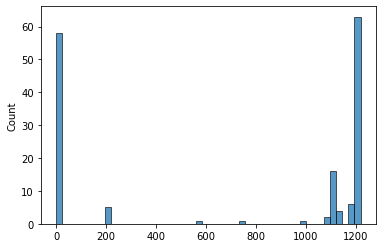

In [475]:
sns.histplot(df.isnull().sum(), bins=50)

<AxesSubplot:ylabel='Count'>

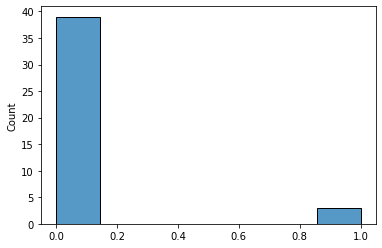

In [476]:
sns.histplot(df.isnull().sum()[df.isnull().sum()<3])

In [477]:
# Drop columns with more than 2 NA values
cols_to_delete = df.columns[df.isnull().sum()>2]
df.drop(cols_to_delete, axis = 1, inplace = True)
df

,id,id_str,name,screen_name,protected,followers_count,fast_followers_count,normal_followers_count,friends_count,listed_count,...,pinned_tweet_ids_str,has_custom_timelines,advertiser_account_type,advertiser_account_service_levels,business_profile_state,translator_type,withheld_in_countries,require_some_consent,entities.description.urls,bot
0,1.582274e+18,1.582274e+18,путешествие в маусвиль,MausvilV,False,0.0,0.0,0.0,1.0,0.0,...,[],False,none,[],none,none,[],False,[],1
1,1.584492e+18,1.584492e+18,Елена Горбачева,lenagrbu,False,0.0,0.0,0.0,6.0,0.0,...,[],False,none,[],none,none,[],False,[],1
2,1.557303e+18,1.557303e+18,Ева Карпова,EvaKarpoff,False,1.0,0.0,1.0,28.0,0.0,...,[],False,none,[],none,none,[],False,[],1
3,1.584519e+18,1.584519e+18,Даниил Воробушкин,d_vorobuskin,False,0.0,0.0,0.0,32.0,0.0,...,[],False,none,[],none,none,[],False,[],1
4,1.580882e+18,1.580882e+18,вечеринка с коктейлями и тако,SVecerinka,False,0.0,0.0,0.0,1.0,0.0,...,[],False,none,[],none,none,[],False,[],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1319,1.583160e+18,1.583160e+18,Runner to Freedom,RunnertoFreedom,False,0.0,0.0,0.0,40.0,0.0,...,[],False,none,[],none,none,[],False,[],0
1320,1.575539e+18,1.575539e+18,@Javi_DarkOSINT,JDarkosint,False,0.0,0.0,0.0,0.0,0.0,...,[],False,none,[],none,none,[],False,[],0
1321,1.580157e+18,1.580157e+18,Vahmurka,admiral_sraka,False,25.0,0.0,25.0,734.0,0.0,...,['1582732534374285312'],True,none,[],none,none,[],False,[],0
1322,1.582674e+18,1.582674e+18,Stellar Wildcat,WildStellarCat,False,0.0,0.0,0.0,17.0,0.0,...,[],False,none,[],none,none,[],False,[],0


*	**Variable:** name of the variable.
*	**Type:** the type or format of the variable. This can be categorical, numeric, Boolean, and so on.
*	**Context:** useful information to understand the semantic space of the variable. In the case of our dataset, the context is the social one.
*	**Expectation:** how relevant is this variable with respect to our task? We can use a scale “High, Medium, Low”.
*	**Comments:** whether or not we have any comments to make on the variable.


In [478]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1220 entries, 0 to 1323
Data columns (total 42 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 1220 non-null   float64
 1   id_str                             1220 non-null   float64
 2   name                               1219 non-null   object 
 3   screen_name                        1220 non-null   object 
 4   protected                          1220 non-null   object 
 5   followers_count                    1220 non-null   float64
 6   fast_followers_count               1220 non-null   float64
 7   normal_followers_count             1220 non-null   float64
 8   friends_count                      1220 non-null   float64
 9   listed_count                       1220 non-null   float64
 10  created_at                         1220 non-null   object 
 11  favourites_count                   1220 non-null   float

In [479]:
df.nunique()

id                                   1220
id_str                               1220
name                                 1206
screen_name                          1220
protected                               2
followers_count                       113
fast_followers_count                    1
normal_followers_count                113
friends_count                         215
listed_count                           21
created_at                           1220
favourites_count                      466
geo_enabled                             2
verified                                1
statuses_count                        624
media_count                           182
contributors_enabled                    1
is_translator                           1
is_translation_enabled                  1
profile_background_color                2
profile_background_tile                 1
profile_image_url                    1174
profile_image_url_https              1174
profile_link_color                

Variable Type Context Expectation Comments 
https://developer.twitter.com/en/docs/twitter-api/v1/data-dictionary/object-model/user
---  ------                             --------------  -----  
0. **id** - int64 - 585 - The integer representation of the unique identifier for this User - **index**
1. **id_str** - int64 - 585 - The string representation of the unique identifier for this User. - **drop**
2. **name** - object - 582 - The name of the user, as they’ve defined it. Not necessarily a person’s name. - **leave**
3. **screen_name** - object - 585 - The screen name, handle, or alias that this user identifies themselves with. screen_names are unique but subject to change. Use id_str as a user identifier whenever possible. - **leave**
4. **protected** - bool - 2 - When true, indicates that this user has chosen to protect their Tweets. - **feature**
5. **followers_count** - int64 - 32 - The number of followers this account currently has. - **feature**
6. **fast_followers_count** - int64 - 1 -  - **drop**
7. **normal_followers_count** - int64 - 32 -  - **drop**
8. **friends_count** - int64 - 66 - The number of users this account is following (AKA their “followings”). - **feature**
9. **listed_count** - int64 - 11 - The number of public lists that this user is a member of.  - **feature**
10. **created_at** - object - 585 - The UTC datetime that the user account was created on Twitter. - **feature**
11. **favourites_count** - int64 - 80 - The number of Tweets this user has liked in the account’s lifetime. - **feature**
12. **geo_enabled** - bool - 1 - This field must be true for the current user to attach geographic data when using POST statuses / update - **feature**
13. **verified** - bool - 1 - When true, indicates that the user has a verified account. - **feature**
14. **statuses_count** - int64 - 276 - The number of Tweets (including retweets) issued by the user. - **feature**
15. **media_count** - int64 - 31 -  - **feature**
16. **contributors_enabled** - bool - 1 - deprecated - **drop**
17. **is_translator** - bool - 1 - deprecated - **drop**
18. **is_translation_enabled** - bool - 1 - deprecated - **drop**
19. **profile_background_color** - object - 1 - deprecated - **drop**
20. **profile_background_tile** - bool - 1 - deprecated - **drop**
21. **profile_image_url** - object - 569 - deprecated - **drop**
22. **profile_image_url_https** - object - 569 - deprecated - **drop**
23. **profile_link_color** - object - 1 - deprecated - **drop**
24. **profile_sidebar_border_color** - object - 1 - deprecated - **drop**
25. **profile_sidebar_fill_color** - object - 1 - deprecated - **drop**
26. **profile_text_color** - int64 - 1 - deprecated - **drop**
27. **profile_use_background_image** - bool - 1 - deprecated - **drop**
28. **has_extended_profile** - bool - 1 - deprecated - **drop**
29. **default_profile** - bool - 1 - When true, indicates that the user has not altered the theme or background of their user profile. - **feature**
30. **default_profile_image** - bool - 2 - When true, indicates that the user has not uploaded their own profile image and a default image is used instead.  - **feature**
31. **pinned_tweet_ids** - object - 23 - Unique identifier of this user's pinned Tweet. - **leave**
32. **pinned_tweet_ids_str** - object - 23 - Unique identifier of this user's pinned Tweet. - **drop**
33. **has_custom_timelines** - bool - 2 -  - **feature**
34. **advertiser_account_type** - object - 1 -  - **feature**
35. **advertiser_account_service_levels** - object - 1 -  - **feature**
36. **business_profile_state** - object - 1 -  - **feature**
37. **translator_type** - object - 1 - deprecated - **drop**
38. **withheld_in_countries** - object - 1 - Provides a list of countries where this user is not available. - **feature**
39. **require_some_consent** - bool - 1 -  - **drop**
40. **entities.description.urls** - object - 1 - Represents URLs included in the text of a Tweet. - **feature**
41. **status.created_at** - object - 583 - UTC time when this Tweet was created. - **feature**
42. **status.id** - float64 - 583 - The integer representation of the unique identifier for this Tweet. - **feature**
43. **status.id_str** - float64 - 583 - The string representation of the unique identifier for this Tweet. - **feature**
44. **status.text** - object - 582 - The actual UTF-8 text of the status update. - **feature**
45. **status.truncated** - object - 2 - Indicates whether the value of the text parameter was truncated, for example, as a result of a retweet exceeding the original Tweet text length limit of 140 characters. - **feature**
46. **status.entities.hashtags** - object - 1 - Represents hashtags which have been parsed out of the Tweet text. - **feature**
47. **status.entities.symbols** - object - 1 - Represents symbols, i.e. $cashtags, included in the text of the Tweet. - **feature**
48. **status.entities.user_mentions** - object - 262 - Represents other Twitter users mentioned in the text of the Tweet. - **feature**
49. **status.entities.urls** - object - 179 - Represents URLs included in the text of a Tweet. - **feature**
50. **status.source** - object - 1 - Utility used to post the Tweet, as an HTML-formatted string. Tweets from the Twitter website have a source value of web. - **feature**
51. **status.is_quote_status** - object - 2 - Indicates whether this is a Quoted Tweet.  - **feature**
52. **status.retweet_count** - float64 - 10 - Number of times this Tweet has been retweeted. - **feature**
53. **status.favorite_count** - float64 - 7 - Indicates approximately how many times this Tweet has been liked by Twitter users. - **feature**
54. **status.favorited** - object - 1 - Indicates whether this Tweet has been liked by the authenticating user. - **feature**
55. **status.retweeted** - object - 1 - Indicates whether this Tweet has been Retweeted by the authenticating user. - **feature**
56. **status.lang** - object - 6 - When present, indicates a BCP 47 language identifier corresponding to the machine-detected language of the Tweet text, or und if no language could be detected. - **feature**


In [480]:
import datetime

# convert to datetime datatype
df['created_at'] = pd.to_datetime(df['created_at'])

today = datetime.datetime.now(df.created_at[0].tzinfo)
df['life_span'] = (today - df['created_at']).dt.days
df['life_span']

0       20
1       14
2       89
3       14
4       24
        ..
1319    18
1320    39
1321    26
1322    19
1323    14
Name: life_span, Length: 1220, dtype: int64

In [481]:
# After some research I decised to go with a following list of columns:
numerical = ['statuses_count',
             'followers_count',
             'friends_count',
             'favourites_count',
             'listed_count',
             'media_count',
             'life_span']

categorical = ['default_profile_image',
              'geo_enabled',
              'protected',
              'verified',
              'has_custom_timelines',
              'advertiser_account_type']

# Setting up the validation framework

In [517]:
from sklearn.model_selection import train_test_split

df_full_train, df_test = train_test_split(df[numerical + categorical + ['bot']], test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

len(df_train), len(df_val), len(df_test)

(732, 244, 244)

In [518]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.bot.values
y_val = df_val.bot.values
y_test = df_test.bot.values

del df_train['bot']
del df_val['bot']
del df_test['bot']

In [484]:
df_full_train = df_full_train.reset_index(drop=True)

df_full_train.isnull().sum()

statuses_count             0
followers_count            0
friends_count              0
favourites_count           0
listed_count               0
media_count                0
life_span                  0
default_profile_image      0
geo_enabled                0
protected                  0
verified                   0
has_custom_timelines       0
advertiser_account_type    0
bot                        0
dtype: int64

In [485]:
df_full_train.bot.value_counts(normalize=True)

1    0.546107
0    0.453893
Name: bot, dtype: float64

# Feature importance: Mutual information

In [486]:
from sklearn.metrics import mutual_info_score

In [487]:
def mutual_info_bot_score(series):
    return mutual_info_score(series, df_full_train.bot)

mi = df_full_train[categorical].apply(mutual_info_bot_score)
mi.sort_values(ascending=False)

has_custom_timelines       0.074310
advertiser_account_type    0.029988
geo_enabled                0.015610
default_profile_image      0.005453
protected                  0.000283
verified                   0.000000
dtype: float64

# Feature importance: Correlation

In [488]:
#Correlation 

df_full_train[numerical].corr()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,media_count,life_span
statuses_count,1.000000,0.793385,0.261084,0.030353,0.823031,0.989894,0.590608
followers_count,0.793385,1.000000,0.599288,0.185182,0.798558,0.796847,0.499967
friends_count,0.261084,0.599288,1.000000,0.386106,0.371325,0.292779,0.280976
favourites_count,0.030353,0.185182,0.386106,1.000000,0.141483,0.032356,0.413951
listed_count,0.823031,0.798558,0.371325,0.141483,1.000000,0.814376,0.641521
media_count,0.989894,0.796847,0.292779,0.032356,0.814376,1.000000,0.572446
life_span,0.590608,0.499967,0.280976,0.413951,0.641521,0.572446,1.000000


<AxesSubplot:>

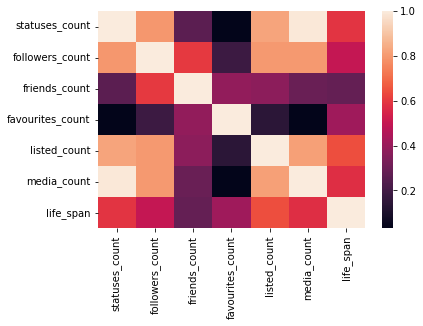

In [489]:
#Correlation plot

sns.heatmap(df_full_train[numerical].corr())

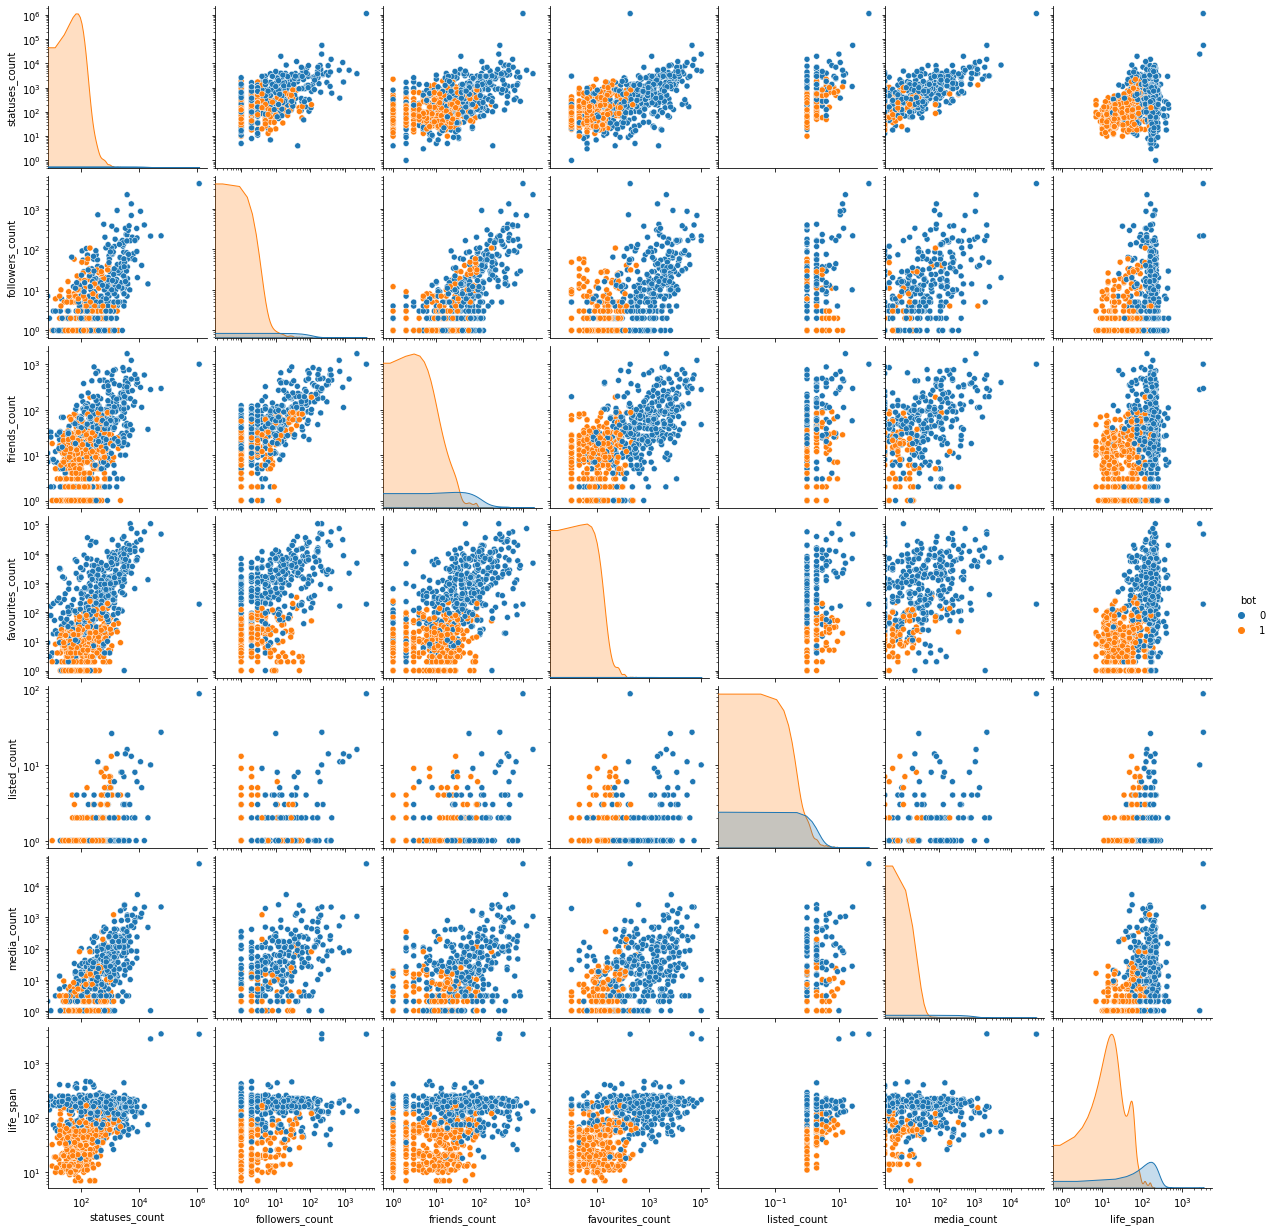

In [491]:
import seaborn as sns

splot = sns.pairplot(df_full_train[numerical + ['bot']], hue='bot')
splot.set(xscale="log")
splot.set(yscale="log")

# One-hot encoding

In [500]:
# Use Scikit-Learn to encode categorical features

from sklearn.feature_extraction import DictVectorizer

In [501]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

# Logistic regression

In [502]:
from sklearn.linear_model import LogisticRegression

In [503]:
model = LogisticRegression(solver='lbfgs', C=1.0, max_iter=1000, random_state=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=1)

In [504]:
model.intercept_[0].round(2)

4.84

In [505]:
model.coef_[0].round(3)

array([ 8.490e-01, -8.310e-01, -1.596e+00, -1.500e-02,  2.100e-02,
       -2.100e-02, -2.680e-01, -1.285e+00, -4.300e-02,  2.000e-01,
        1.000e-03,  2.140e-01, -0.000e+00,  0.000e+00])

In [506]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [507]:
y_pred = model.predict(X_val)
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1], dtype=int64)

In [508]:
model.predict_proba(X_val)

array([[9.09102582e-003, 9.90908974e-001],
       [3.42519368e-002, 9.65748063e-001],
       [4.64285256e-002, 9.53571474e-001],
       [4.24668329e-001, 5.75331671e-001],
       [7.93999195e-003, 9.92060008e-001],
       [1.00000000e+000, 4.56463236e-020],
       [8.24163499e-001, 1.75836501e-001],
       [2.27239355e-001, 7.72760645e-001],
       [9.51243564e-001, 4.87564360e-002],
       [8.26303123e-001, 1.73696877e-001],
       [1.43311269e-001, 8.56688731e-001],
       [4.17711557e-001, 5.82288443e-001],
       [1.00000000e+000, 7.32425672e-045],
       [6.77402364e-001, 3.22597636e-001],
       [5.40499116e-002, 9.45950088e-001],
       [5.19891679e-002, 9.48010832e-001],
       [2.20123143e-002, 9.77987686e-001],
       [1.00000000e+000, 6.11416003e-020],
       [1.20913837e-002, 9.87908616e-001],
       [9.99999318e-001, 6.81932125e-007],
       [9.60298109e-002, 9.03970189e-001],
       [7.93656387e-002, 9.20634361e-001],
       [2.94325396e-002, 9.70567460e-001],
       [9.9

In [509]:
# accuracy on the validation dataset
y_pred = model.predict_proba(X_val)[:, 1]
bot = y_pred > 0.5
round((y_val == bot).mean(),3)

0.934

# LogisticRegression parameters tuning
The C parameter which is a regularization can be tuned by training models with different values of C with a cross validation.

In [510]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold
from sklearn import preprocessing

In [511]:
features = numerical + categorical

def train(df_train, y_train, C=1.0):
    dicts = df_train[features].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    scaler = preprocessing.StandardScaler().fit(X_train)
    X_scaled = scaler.transform(X_train)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_scaled, y_train)
    
    return dv, model

def predict(df, dv, model):
    dicts = df[features].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [512]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10, 15, 20]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.bot.values
        y_val = df_val.bot.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.4f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/9 [00:00<?, ?it/s]

C=0.001 0.9718 +- 0.022
C=0.01 0.9768 +- 0.017
C=0.1 0.9759 +- 0.018
C=0.5 0.9447 +- 0.028
C=1 0.9171 +- 0.025
C=5 0.8298 +- 0.023
C=10 0.7971 +- 0.028
C=15 0.7794 +- 0.036
C=20 0.7626 +- 0.034


# Decision trees

In [513]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [519]:
train_dicts = df_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [520]:
val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9178921568627451

# Decision trees parameter tuning

* selecting `max_depth`
* selecting `min_samples_leaf`

In [522]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]

for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.860
   2 -> 0.933
   3 -> 0.939
   4 -> 0.944
   5 -> 0.935
   6 -> 0.904
  10 -> 0.908
  15 -> 0.918
  20 -> 0.914
None -> 0.909


In [523]:
scores = []

for depth in [2, 3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [524]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth             2      3      4      5
min_samples_leaf                            
1                 0.933  0.939  0.946  0.917
5                 0.933  0.959  0.982  0.978
10                0.933  0.966  0.974  0.971
15                0.933  0.972  0.980  0.976
20                0.933  0.960  0.969  0.969
100               0.942  0.949  0.949  0.949
200               0.912  0.912  0.912  0.912
500               0.500  0.500  0.500  0.500

<AxesSubplot:xlabel='None-max_depth', ylabel='min_samples_leaf'>

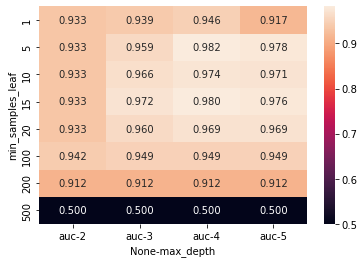

In [525]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

So our best model will use 'max_depth' = 4,  'min_samples_leaf' = 5

In [526]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)

In [527]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- life_span <= 91.50
|   |--- favourites_count <= 122.00
|   |   |--- media_count <= 41.50
|   |   |   |--- life_span <= 62.50
|   |   |   |   |--- class: 1
|   |   |   |--- life_span >  62.50
|   |   |   |   |--- class: 1
|   |   |--- media_count >  41.50
|   |   |   |--- class: 0
|   |--- favourites_count >  122.00
|   |   |--- friends_count <= 22.50
|   |   |   |--- class: 0
|   |   |--- friends_count >  22.50
|   |   |   |--- favourites_count <= 211.00
|   |   |   |   |--- class: 0
|   |   |   |--- favourites_count >  211.00
|   |   |   |   |--- class: 0
|--- life_span >  91.50
|   |--- favourites_count <= 11.00
|   |   |--- life_span <= 130.50
|   |   |   |--- class: 1
|   |   |--- life_span >  130.50
|   |   |   |--- followers_count <= 3.00
|   |   |   |   |--- class: 0
|   |   |   |--- followers_count >  3.00
|   |   |   |   |--- class: 0
|   |--- favourites_count >  11.00
|   |   |--- favourites_count <= 29.00
|   |   |   |--- friends_count <= 14.50
|   |   |   |   |--- clas

In [528]:
dt = DecisionTreeClassifier(max_depth=4, min_samples_leaf=5)
dt.fit(X_train, y_train)

val_dicts = df_val.fillna(0).to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9724605119825708

# Random forest

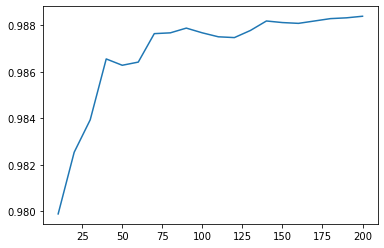

In [529]:
from sklearn.ensemble import RandomForestClassifier

scores = []

for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    
    scores.append((n, auc))

df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
plt.plot(df_scores.n_estimators, df_scores.auc)

In [530]:
df_scores[df_scores.auc == df_scores.auc.max()]

,n_estimators,auc
19,200,0.988392


In [537]:
n_estimators = 200

In [531]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

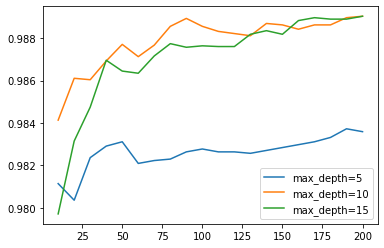

In [532]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [533]:
max_depth = 10

In [534]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

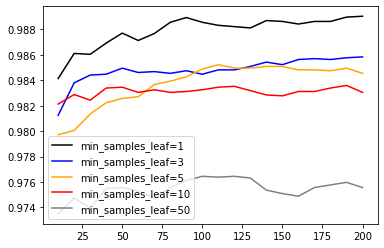

In [535]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [536]:
min_samples_leaf = 1

So our best model will use 'max_depth' = 10, 'min_samples_leaf' = 1

In [538]:
rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

In [539]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9890386710239651

# Gradient boosting and XGBoost

In [542]:
import xgboost as xgb

In [543]:
features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [544]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [545]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9836260893246187

In [546]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [547]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [548]:
s = output.stdout
print(s[:200])

[0]	train-auc:0.98857	val-auc:0.96885
[5]	train-auc:0.99615	val-auc:0.98206
[10]	train-auc:0.99832	val-auc:0.98386
[15]	train-auc:0.99933	val-auc:0.98621
[20]	train-auc:0.99979	val-auc:0.98686
[25]	tr


In [549]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [550]:
df_score = parse_xgb_output(output)

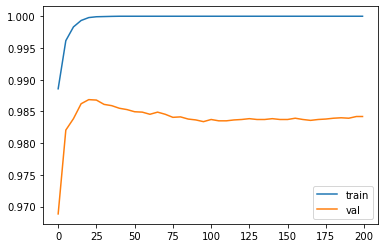

In [551]:
plt.plot(df_score.num_iter, df_score.train_auc, label='train')
plt.plot(df_score.num_iter, df_score.val_auc, label='val')
plt.legend()

# XGBoost parameter tuning
Tuning the following parameters:

* eta
* max_depth
* min_child_weight

In [553]:
scores = {}

In [554]:
%%capture output

xgb_params = {
    'eta': 0.5, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [555]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.5'

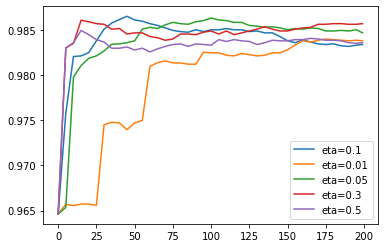

In [337]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

#plt.ylim(0.8, 0.84)
plt.legend()

In [ ]:
eta = 0.1

In [338]:
scores = {}

In [344]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 10,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [345]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=10'

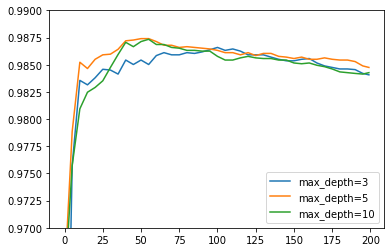

In [348]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.97, 0.99)
plt.legend()

In [ ]:
max_depth = 5

In [354]:
scores = {}

In [361]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [362]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

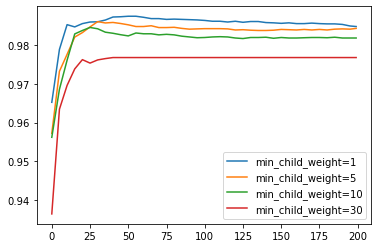

In [363]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

#plt.ylim(0.82, 0.84)
plt.legend()

In [ ]:
min_child_weight = 1

In [364]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=50)

# Selecting the final model

In [459]:
lr = LogisticRegression(solver='lbfgs', C=0.01, max_iter=1000, random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(C=0.01, max_iter=1000, random_state=1)

In [460]:
y_pred = lr.predict_proba(X_val)[:,1]
roc_auc_score(y_val, y_pred)

0.9643465304384844

In [367]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=15)

In [368]:
y_pred = dt.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9799155773420479

In [369]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

In [370]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.988630174291939

In [371]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 5,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=50)

In [372]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9874727668845316

In [375]:
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = df_full_train.bot.values
del df_full_train['bot']

In [377]:
full_train_dicts = df_full_train.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(full_train_dicts)

In [557]:
rf = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=1)
rf.fit(X_full_train, y_full_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=1)

In [558]:
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

1.0

In [556]:
test_dicts = df_test.fillna(0).to_dict(orient='records')
X_test = dv.transform(test_dicts)

y_pred = dt.predict_proba(X_test)[:, 1]
roc_auc_score(y_test, y_pred)

0.9722450095706863